# The battle of the Neighborhoods

## Import neccesary libraries

In [2]:
import requests 
import pandas as pd 
import numpy as np
import random

## Geopy Geocoders uses Nominatim to find latitude and longitude of locations

In [3]:
!pip install geopy
from geopy.geocoders import Nominatim

In [4]:
from IPython.display import Image 
from IPython.core.display import HTML 

In [5]:
from pandas.io.json import json_normalize


## Folium is used to display maps

In [6]:
!pip install folium

In [8]:
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## First we display the map of Paris, France 

In [9]:
address = 'paris, France'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

48.8566969 2.3514616


In [10]:
paris_map = folium.Map(location =[latitude, longitude],zoom_start = 12)
paris_map

## We find all the barbers in Paris France using Foursquare data

In [11]:
search_query = 'Barber'
radius = 10000
print(search_query + ' .... OK!')

Barber .... OK!


In [12]:
CLIENT_ID = 'NT1CFSILL0KU4Y31AW30NJLD5B0KLVW3XSHDEWY03UX1PPPP' # your Foursquare ID
CLIENT_SECRET = 'SAZUCTD10AD2DWVTDTEA4ZAL2GYSI34RCYSKMNBODBKDXM5S' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails: KUSH KX')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails: KUSH KX
CLIENT_ID: NT1CFSILL0KU4Y31AW30NJLD5B0KLVW3XSHDEWY03UX1PPPP
CLIENT_SECRET:SAZUCTD10AD2DWVTDTEA4ZAL2GYSI34RCYSKMNBODBKDXM5S


In [13]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=NT1CFSILL0KU4Y31AW30NJLD5B0KLVW3XSHDEWY03UX1PPPP&client_secret=SAZUCTD10AD2DWVTDTEA4ZAL2GYSI34RCYSKMNBODBKDXM5S&ll=48.8566969,2.3514616&v=20180604&query=Barber&radius=10000&limit=30'

In [14]:
results = requests.get(url).json()


In [15]:
venues = results['response']['venues']

venues

[{'id': '5e9da65cda8b5b0008a1ae37',
  'name': 'The Barber Company - Coiffeur Barbier Paris',
  'location': {'address': 'rue Pierre Lescot',
   'lat': 48.861886,
   'lng': 2.347212,
   'labeledLatLngs': [{'label': 'display', 'lat': 48.861886, 'lng': 2.347212}],
   'distance': 656,
   'postalCode': '75001',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ['rue Pierre Lescot', '75001 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d110951735',
    'name': 'Salon / Barbershop',
    'pluralName': 'Salons / Barbershops',
    'shortName': 'Salon / Barbershop',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/salon_barber_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1591402817',
  'hasPerk': False},
 {'id': '5bdd8847a35dce002c8bcd91',
  'name': 'The Barber Compagny',
  'location': {'lat': 48.861808,
   'lng': 2.347065,
   'labeledLatLngs': [{'label': 'display', 'lat': 48.861808

## Convert json file into pandas dataframe

In [16]:
paris_barbers = json_normalize(venues)
paris_barbers.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,5e9da65cda8b5b0008a1ae37,rue Pierre Lescot,FR,Paris,France,NaN,656,"[rue Pierre Lescot, 75001 Paris, France]","[{'label': 'display', 'lat': 48.861886, 'lng':...",48.861886,2.347212,75001,Île-de-France,The Barber Company - Coiffeur Barbier Paris,v-1591402817,NaN
1,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,5bdd8847a35dce002c8bcd91,NaN,FR,Paris,France,NaN,653,"[75001 Paris, France]","[{'label': 'display', 'lat': 48.861808, 'lng':...",48.861808,2.347065,75001,Île-de-France,The Barber Compagny,v-1591402817,NaN
2,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,5b8eb2bac876c8002c6d4911,61 avenue Franklin Delano Roosevelt,FR,Paris,France,NaN,3474,"[61 avenue Franklin Delano Roosevelt, 75008 Pa...","[{'label': 'display', 'lat': 48.871698, 'lng':...",48.871698,2.309857,75008,Île-de-France,The Barber Company - Coiffeur Barbier Paris,v-1591402817,NaN
3,"[{'id': '4bf58dd8d48988d110951735', 'name': 'S...",False,5d13d9e05cbbb2002fd2d681,6 Rue des Prêcheurs,FR,Paris,France,NaN,620,"[6 Rue des Prêcheurs, 75001 Paris, France]","[{'label': 'display', 'lat': 48.862015, 'lng':...",48.862015,2.348937,75001,Île-de-France,Prestige Barber,v-1591402817,NaN
4,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",False,4d777401bc888cfae4bce973,NaN,FR,Paris,France,NaN,897,"[Paris, France]","[{'label': 'display', 'lat': 48.858184, 'lng':...",48.858184,2.339419,NaN,Île-de-France,Jame's Barber shop,v-1591402817,NaN


## Clean the dataframe

In [17]:
filtered_columns = ['name'] + [col for col in paris_barbers.columns if col.startswith('location.')] + ['id']
paris_barbers_f = paris_barbers.loc[:,filtered_columns]

paris_barbers_f.shape

(30, 14)

In [18]:
# clean column names by keeping only last term
paris_barbers_f.columns = [column.split('.')[-1] for column in paris_barbers_f.columns]

paris_barbers_f.drop(['crossStreet','labeledLatLngs'], axis = 1, inplace = True)

In [97]:
paris_barbers_f

,name,address,cc,city,country,distance,formattedAddress,lat,lng,postalCode,state,id
0,The Barber Company - Coiffeur Barbier Paris,rue Pierre Lescot,FR,Paris,France,656,"[rue Pierre Lescot, 75001 Paris, France]",48.861886,2.347212,75001,Île-de-France,5e9da65cda8b5b0008a1ae37
1,The Barber Compagny,NaN,FR,Paris,France,653,"[75001 Paris, France]",48.861808,2.347065,75001,Île-de-France,5bdd8847a35dce002c8bcd91
2,The Barber Company - Coiffeur Barbier Paris,61 avenue Franklin Delano Roosevelt,FR,Paris,France,3474,"[61 avenue Franklin Delano Roosevelt, 75008 Pa...",48.871698,2.309857,75008,Île-de-France,5b8eb2bac876c8002c6d4911
3,Prestige Barber,6 Rue des Prêcheurs,FR,Paris,France,620,"[6 Rue des Prêcheurs, 75001 Paris, France]",48.862015,2.348937,75001,Île-de-France,5d13d9e05cbbb2002fd2d681
4,Jame's Barber shop,NaN,FR,Paris,France,897,"[Paris, France]",48.858184,2.339419,NaN,Île-de-France,4d777401bc888cfae4bce973
5,Grizzly Barber Shop,NaN,FR,NaN,France,1207,[France],48.859043,2.367555,NaN,NaN,582df03ed1c8fe5507107c3c
6,The Barber Shop,43 avenue Gambetta,FR,Courbevoie,France,8724,"[43 avenue Gambetta, 92400 Courbevoie, France]",48.893196,2.246009,92400,Île-de-France,5a2ab44aad910e76082a09f6
7,235th Barber Street,NaN,FR,Paris,France,1278,"[75002 Paris, France]",48.867764,2.346791,75002,Île-de-France,58f7a6062bf9a9608bc15569
8,Vbs Barber And Shop,NaN,FR,Paris,France,1338,"[75002 Paris, France]",48.868668,2.349808,75002,Île-de-France,5d8a461e1ef3500008f54089
9,Barber Shop,NaN,FR,NaN,France,1832,[France],48.871981,2.360758,NaN,NaN,4f428271e4b0f9f81ba2770c


## Add all the barber shops to the paris map with the cloud icon

In [20]:
from folium import plugins

paris_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

barbers = plugins.MarkerCluster().add_to(paris_map)

for lat, lng, label in zip(paris_barbers_f.lat, paris_barbers_f.lng, paris_barbers_f.name): 
    folium.Marker(location =[lat,lng], icon=folium.Icon(color='red', icon='cloud'), popup = label,).add_to(barbers) 
    
paris_map

## Now to get the data of all Arrondissement in France

In [21]:
url = 'https://en.wikipedia.org/wiki/Arrondissements_of_Paris' 
url 

df = pd.read_html(url, header = 0) 

paris_arr = df[2]
paris_arr

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Area (km2),Population(March 1999 census),Population(July 2005 estimate),Density (2005)(inhabitants per km2),Peak of population,Mayor
0,1st (Ier) R,Louvre,1.826 km2 (0.705 sq mi),16888,17700,9693,before 1861,Jean-François Legaret (LR)
1,2nd (IIe) R,Bourse,0.992 km2 (0.383 sq mi),19585,20700,20867,before 1861,Jacques Boutault (EELV)
2,3rd (IIIe) R,Temple,1.171 km2 (0.452 sq mi),34248,35100,29974,before 1861,Pierre Aidenbaum (PS)
3,4th (IVe) R,Hôtel-de-Ville,1.601 km2 (0.618 sq mi),30675,28600,17864,before 1861,Ariel Weil (PS)
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),58849,60600,23849,1911,Florence Berthout (LR)
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),44919,45200,20984,1911,Jean-Pierre Lecoq (LR)
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),56985,55400,13552,1926,Rachida Dati (LR)
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),39314,38700,9972,1891,Jeanne d'Hauteserre (LR)
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),55838,58500,26847,1901,Delphine Bürkli (LR)
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),89612,88800,30705,1881,Alexandra Cordebard (PS)


In [22]:
column_names =['Arrondissement (R for Right Bank, L for Left Bank)','Name']
paris_arr = paris_arr.loc[:,column_names]
paris_arr['Name'] = paris_arr['Name'] + ", Paris"
paris_arr.head()

,"Arrondissement (R for Right Bank, L for Left Bank)",Name
0,1st (Ier) R,"Louvre, Paris"
1,2nd (IIe) R,"Bourse, Paris"
2,3rd (IIIe) R,"Temple, Paris"
3,4th (IVe) R,"Hôtel-de-Ville, Paris"
4,5th (Ve) L,"Panthéon, Paris"


## To get latitude and longitude of all Arrondissement using Geopy

In [23]:
lat =[]
lng =[]

In [24]:
for name in paris_arr['Name']:
    address = name 
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    lat.extend([latitude])
    lng.extend([longitude])

In [25]:
lati = pd.DataFrame(lat)
long = pd.DataFrame(lng)

In [26]:
paris_arr['Latitude'] = lati
paris_arr['Longitude'] = long

In [30]:
paris_arr

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Latitude,Longitude
0,1st (Ier) R,"Louvre, Paris",48.861147,2.338028
1,2nd (IIe) R,"Bourse, Paris",48.868630,2.341474
2,3rd (IIIe) R,"Temple, Paris",48.866500,2.360708
3,4th (IVe) R,"Hôtel-de-Ville, Paris",48.856426,2.352528
4,5th (Ve) L,"Panthéon, Paris",48.846191,2.346079
5,6th (VIe) L,"Luxembourg, Paris",48.848300,2.328200
6,7th (VIIe) L,"Palais-Bourbon, Paris",48.861596,2.317909
7,8th (VIIIe) R,"Élysée, Paris",48.846644,2.369830
8,9th (IXe) R,"Opéra, Paris",48.870645,2.332330
9,10th (Xe) R,"Entrepôt, Paris",48.876106,2.359910


In [31]:
paris_arr.loc[5,'Latitude']  = 48.8483
paris_arr.loc[5,'Longitude'] = 2.3282 
paris_arr

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Latitude,Longitude
0,1st (Ier) R,"Louvre, Paris",48.861147,2.338028
1,2nd (IIe) R,"Bourse, Paris",48.868630,2.341474
2,3rd (IIIe) R,"Temple, Paris",48.866500,2.360708
3,4th (IVe) R,"Hôtel-de-Ville, Paris",48.856426,2.352528
4,5th (Ve) L,"Panthéon, Paris",48.846191,2.346079
5,6th (VIe) L,"Luxembourg, Paris",48.848300,2.328200
6,7th (VIIe) L,"Palais-Bourbon, Paris",48.861596,2.317909
7,8th (VIIIe) R,"Élysée, Paris",48.846644,2.369830
8,9th (IXe) R,"Opéra, Paris",48.870645,2.332330
9,10th (Xe) R,"Entrepôt, Paris",48.876106,2.359910


In [32]:
len(paris_arr)

20

## Now to add data from Barber shops and Arrondissements in france to the Paris Map

In [33]:
from folium import plugins

paris_map = folium.Map(location = [latitude, longitude], zoom_start = 12)


barbers = plugins.MarkerCluster().add_to(paris_map)

for lat, lng, label in zip(paris_barbers_f.lat, paris_barbers_f.lng, paris_barbers_f.name): 
    folium.Marker(location =[lat,lng], icon=folium.Icon(color='red', icon='cloud'), popup = label,).add_to(barbers) 


districts = plugins.MarkerCluster().add_to(paris_map)

for lat, lng, label in zip(paris_arr.Latitude, paris_arr.Longitude, paris_arr.Name): 
    folium.Marker(location =[lat,lng], icon = None, popup = label,).add_to(districts)
    
paris_map

## Now let's find the number of shops in a 1000m radius of each Arrondissement.

In [95]:
search_query = 'Barber'
radius = 1000 
list =[]

for Lat,Long in zip(paris_arr.Latitude,paris_arr.Longitude):
    latitude = Lat
    longitude = Long
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    df = json_normalize(venues)
    list.extend([len(df)]) 
    
    

In [96]:
list

[8, 10, 11, 8, 1, 1, 1, 3, 3, 4, 9, 1, 2, 3, 1, 0, 1, 3, 1, 4]

In [37]:
number = pd.DataFrame(list)

## Lets add this list to the paris dataframe

In [38]:
paris_arr['Number of barber shops within 1km'] = number

In [39]:
paris_arr

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Latitude,Longitude,Number of barber shops within 1km
0,1st (Ier) R,"Louvre, Paris",48.861147,2.338028,8
1,2nd (IIe) R,"Bourse, Paris",48.868630,2.341474,10
2,3rd (IIIe) R,"Temple, Paris",48.866500,2.360708,11
3,4th (IVe) R,"Hôtel-de-Ville, Paris",48.856426,2.352528,8
4,5th (Ve) L,"Panthéon, Paris",48.846191,2.346079,1
5,6th (VIe) L,"Luxembourg, Paris",48.848300,2.328200,1
6,7th (VIIe) L,"Palais-Bourbon, Paris",48.861596,2.317909,1
7,8th (VIIIe) R,"Élysée, Paris",48.846644,2.369830,3
8,9th (IXe) R,"Opéra, Paris",48.870645,2.332330,3
9,10th (Xe) R,"Entrepôt, Paris",48.876106,2.359910,4


## Import matplotlib libraries

In [40]:
%matplotlib notebook
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [41]:
df_shops = paris_arr.loc[:,['Name'] + ['Number of barber shops within 1km']]
df_shops.set_index('Name',inplace = True)

In [42]:
df_shops

,Number of barber shops within 1km
Name,
"Louvre, Paris",8
"Bourse, Paris",10
"Temple, Paris",11
"Hôtel-de-Ville, Paris",8
"Panthéon, Paris",1
"Luxembourg, Paris",1
"Palais-Bourbon, Paris",1
"Élysée, Paris",3
"Opéra, Paris",3


## Plot a bar chart to show number of barber shops in each Arrondissement in Paris

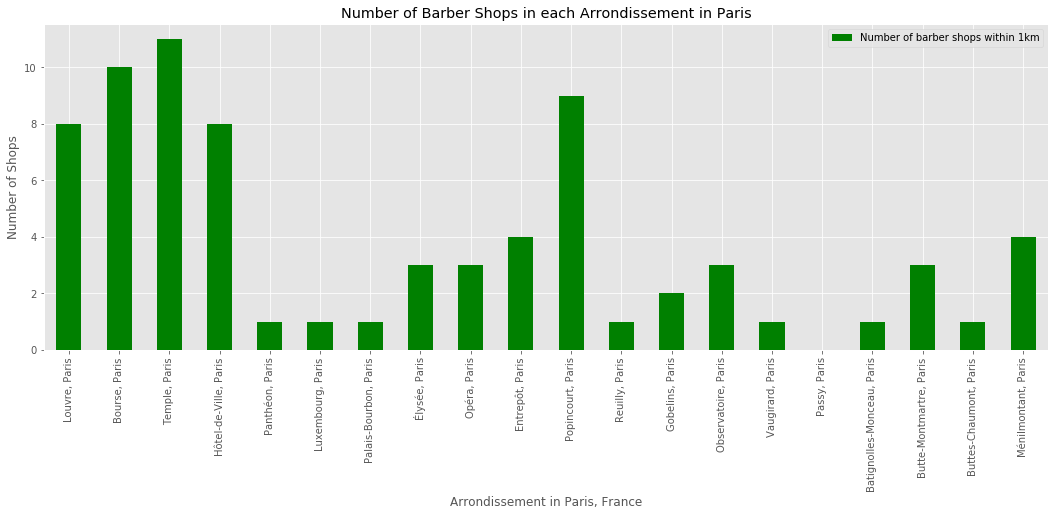

In [64]:
df_shops.plot(kind = 'bar', figsize= (18,6), color = 'green')

plt.title('Number of Barber Shops in each Arrondissement in Paris')
plt.xlabel('Arrondissement in Paris, France')
plt.ylabel('Number of Shops')
plt.show()

## Plot a Pie chart of to show number of barber shops in each Arrondissement in Paris

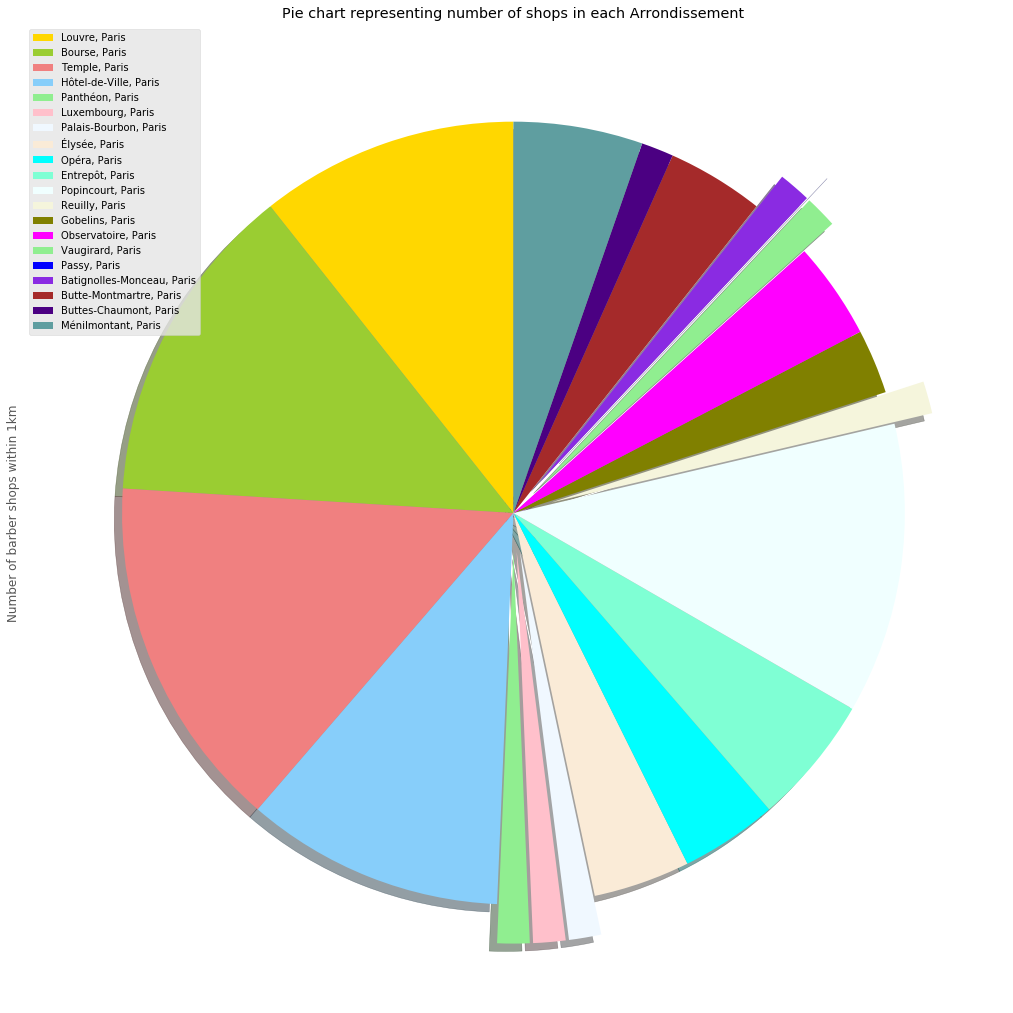

In [89]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','aliceblue','antiquewhite','aqua','aquamarine','azure','beige','olive','fuchsia','lightgreen','blue','blueviolet','brown' 
,'indigo' 
,'cadetblue' 
]
explode_list = [0,0,0,0,0.1,0.1,0.1,0,0,0,0,0.1,0,0,0.1,0.2,0.1,0,0,0]
df_shops['Number of barber shops within 1km'].plot(kind = 'pie',shadow = True, figsize = (18,18),labels = None, startangle = 90,explode =explode_list, colors = color_list)
plt.legend(labels = df_shops.index, loc = 'upperleft')
plt.title('Pie chart representing number of shops in each Arrondissement', y =1.0)
plt.show()